In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
import random

In [19]:
from keras.models import model_from_json

In [20]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [21]:
img_loc = "C:/Users/mavbe/Desktop/Coding Folder/Classes/CAPSTONE/corn/images_handheld/"
labels = ['Sick','Healthy']
img_size = 600 # reshape the images to be square

In [22]:
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [23]:
train = get_data(img_loc + "Train")
val = get_data(img_loc + "Test")

<AxesSubplot:ylabel='count'>

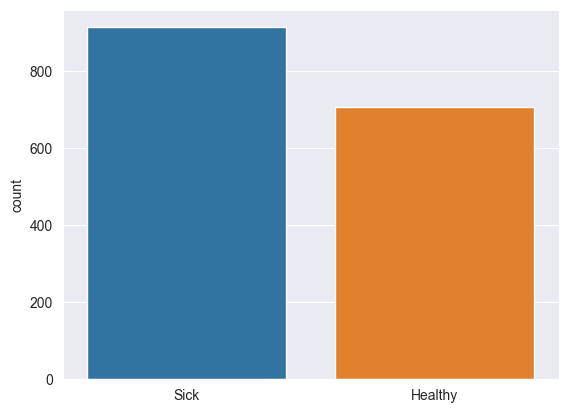

In [24]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Sick")
    else:
        l.append("Healthy")
sns.set_style('darkgrid')
sns.countplot(x=l)

Text(0.5, 1.0, 'Sick')

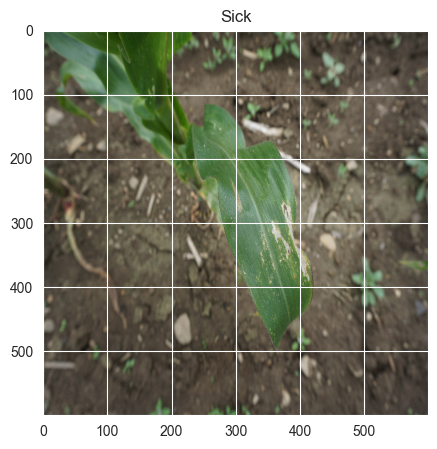

In [25]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Healthy')

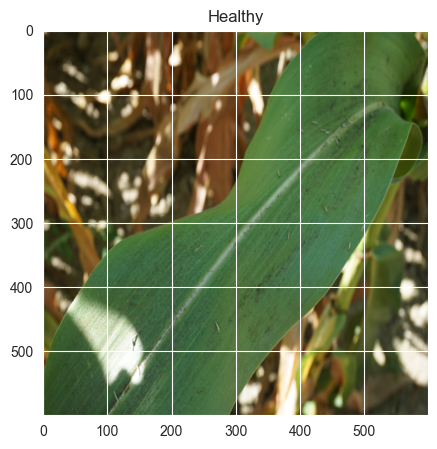

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [27]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [38]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 600, 600, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 300, 300, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 64)      

In [39]:
opt = Adam(learning_rate=1e-5)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [40]:
history = model.fit(x_train,y_train,epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
51/51 [==============================] - 348s 7s/step - loss: 0.6888 - accuracy: 0.5550 - val_loss: 0.6634 - val_accuracy: 0.6272
Epoch 2/25
51/51 [==============================] - 329s 6s/step - loss: 0.6562 - accuracy: 0.6094 - val_loss: 0.6763 - val_accuracy: 0.6272
Epoch 3/25
51/51 [==============================] - 331s 6s/step - loss: 0.6387 - accuracy: 0.6446 - val_loss: 0.6797 - val_accuracy: 0.5917
Epoch 4/25
51/51 [==============================] - 325s 6s/step - loss: 0.6144 - accuracy: 0.6644 - val_loss: 0.7014 - val_accuracy: 0.5740
Epoch 5/25
51/51 [==============================] - 325s 6s/step - loss: 0.5961 - accuracy: 0.6817 - val_loss: 0.7005 - val_accuracy: 0.5917
Epoch 6/25
51/51 [==============================] - 329s 6s/step - loss: 0.5792 - accuracy: 0.6990 - val_loss: 0.7237 - val_accuracy: 0.5444
Epoch 7/25
51/51 [==============================] - 330s 6s/step - loss: 0.5563 - accuracy: 0.7299 - val_loss: 0.7002 - val_accuracy: 0.5740
Epoch 8/25
51

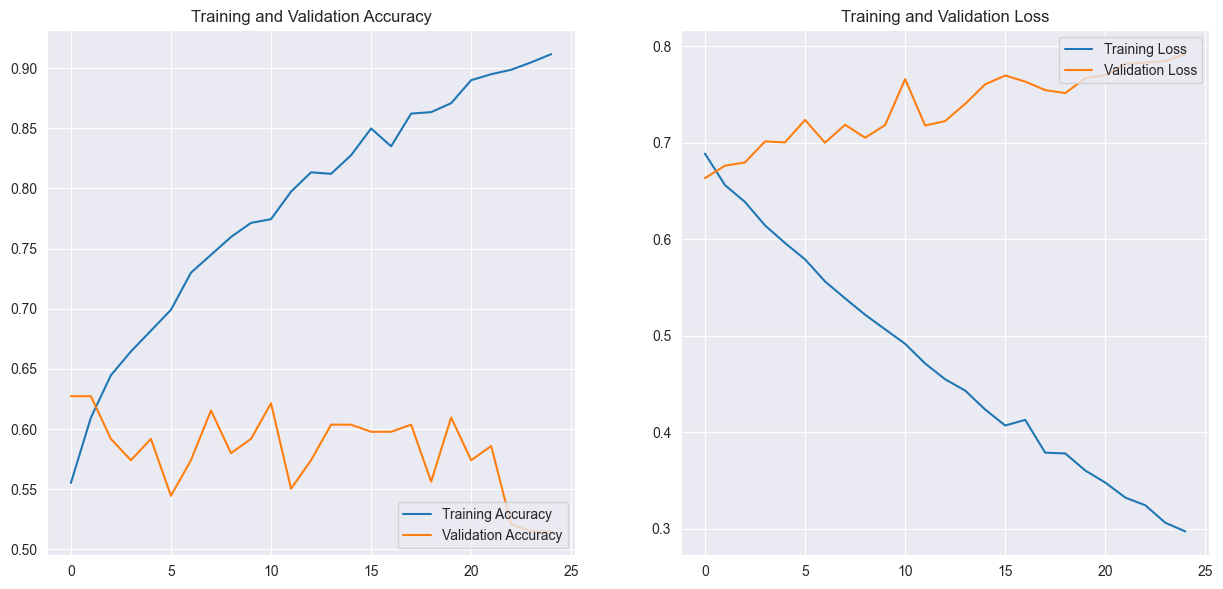

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
predict_x = model.predict(x_val) 
predictions = np.argmax(predict_x,axis=1)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Sick (Class 0)','Healthy (Class 1)']))

6/6 [==============================] - 7s 1s/step
                   precision    recall  f1-score   support

   Sick (Class 0)       0.60      0.66      0.63       106
Healthy (Class 1)       0.32      0.27      0.29        63

         accuracy                           0.51       169
        macro avg       0.46      0.47      0.46       169
     weighted avg       0.50      0.51      0.50       169



In [44]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (img_size, img_size, 3), include_top = False, weights = "imagenet")

9406464/9406464 [==============================] - 1s 0us/step


In [45]:
base_model.trainable = False

In [46]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [47]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [48]:
history = model.fit(x_train,y_train,epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
51/51 [==============================] - 222s 4s/step - loss: 0.7810 - accuracy: 0.4536 - val_loss: 0.7703 - val_accuracy: 0.3964
Epoch 2/25
51/51 [==============================] - 212s 4s/step - loss: 0.7673 - accuracy: 0.4839 - val_loss: 0.7428 - val_accuracy: 0.4379
Epoch 3/25
51/51 [==============================] - 211s 4s/step - loss: 0.7540 - accuracy: 0.4963 - val_loss: 0.7292 - val_accuracy: 0.4734
Epoch 4/25
51/51 [==============================] - 209s 4s/step - loss: 0.7472 - accuracy: 0.4963 - val_loss: 0.7224 - val_accuracy: 0.4911
Epoch 5/25
51/51 [==============================] - 210s 4s/step - loss: 0.7521 - accuracy: 0.5037 - val_loss: 0.7167 - val_accuracy: 0.4970
Epoch 6/25
51/51 [==============================] - 215s 4s/step - loss: 0.7429 - accuracy: 0.4926 - val_loss: 0.7143 - val_accuracy: 0.4793
Epoch 7/25
51/51 [==============================] - 214s 4s/step - loss: 0.7401 - accuracy: 0.5142 - val_loss: 0.7137 - val_accuracy: 0.4852
Epoch 8/25
51

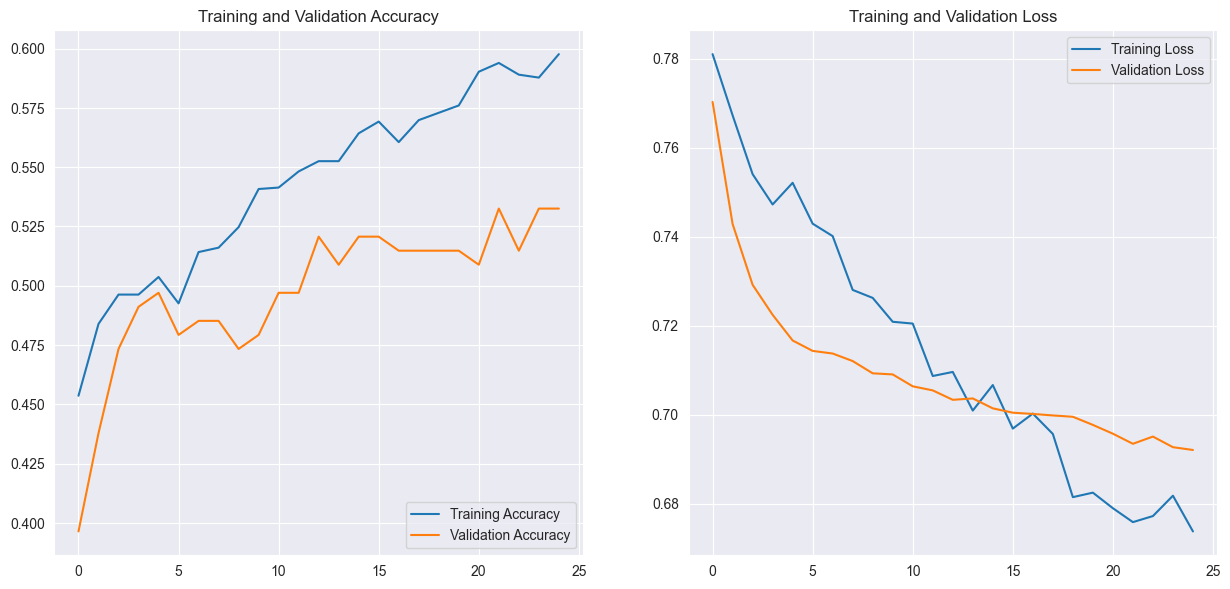

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
# predictions = model.predict_classes(x_val)
# predictions = predictions.reshape(1,-1)[0]
# print(classification_report(y_val, predictions, target_names = ['Sick (Class 0)','Healthy (Class 1)']))

In [51]:
# correct = 0
# for i in range(0,100):
#     idx2 = random.randint(0,len(x_val))
#     plt.imshow(x_val[idx2,:])
#     plt.show()

#     y_pred = model.predict(x_val[idx2,:].reshape(1,img_size,img_size,3))[0][0]
#     print("Actual: ",end='')
#     print("SICK" if y_val[idx2] == 0 else "HEALTHY",end=' | Prediction: ')
#     if y_pred > 0.5:
#         my_str = "{:.2f}".format((y_pred)*100)
#         print(f"SICK\nConfidence: {my_str}%")
#     else:
#         my_str = "{:.2f}".format((1-y_pred)*100)
#         print(f"HEALTHY\nConfidence: {my_str}%")
#     if y_pred > 0.5 and y_val[idx2] == 0:
#         correct += 1
# print("{:.2f}% correct!".format((correct)))

In [57]:
# SAVE THE MODEL TO JSON FILE

json_model = model.to_json()

with open('models/corn_ai.json','w') as json_file:
    json_file.write(json_model)

model.save_weights('models/corn_weights.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'models/corn_ai.json'

In [ ]:
# LOAD THE MODEL FROM JSON FILE

# with open('models/corn_ai.json','r') as json_file:
    # json_savedModel = json_file.read()

# model_j = tf.keras.models.model_from_json(json_savedModel)
# model_j.summary()